# Equalização de Histograma

A transformação de contraste que procura distribuir a ocorrência dos níveis de cinza igualmente
na faixa de tons de cinza é denominada equalização de histograma.

O objetivo do exemplo a seguir é o de fazer a equalização de histograma de uma imagem. Ele é
dado pela aplicação de uma transformação de contraste T(r) que é calculado pelo histograma
acumulado normalizado da imagem.

## Equação da Transformação de Intensidade para Equalizar Histograma

A equação da transformação de intensidade T(r) a partir do histograma h(i) da imagem que equaliza
a imagem, é dada por:

$$   T(r) = \frac{(L-1)}{n} \sum_{i = 0}^{r} h(i), \quad r = 0, 1,..., L-1 $$
   
- Os valores de intensidade dos pixels da imagem (indices i e r) variam de 0 a L-1;
- n é o número total de pixels na imagem;
- $h(i)$ é o histograma da imagem, i. e., é o número de vezes que o nível de cinza i aparece na imagem;    
- $T(r)$ é a função de mapeamento que equaliza a imagem dada pelo histograma $h$.
- $L$ é o número de níveis na imagem final, usualmente 256 para imagens ``uint8``.


Existem dois pontos que devem ser considerados no uso da equalização de histograma:

1. A formulação acima é exata no caso contínuo. Para o caso discreto, o histograma equalizado
   não fica totalmente planar pois não é possível no modelo acima distribuir um nível de cinza
   com muita ocorrência em mais de um valor de cinza. Normalmente mostra-se o histograma acumulado
   que é normalmente uma reta de 45 graus, como será visto no exemplo abaixo. Veremos num outro
   tutorial uma forma de contornar este problema.
   

## Ilustração da equalização de histograma

A imagem original é mostrada a seguir, e para fins ilustrativos, a imagem com seus pixels ordenados também é mostrada ao
lado mostrando por exemplo que a imagem tem uma predominância de níveis de cinza escuros, bem 
destacados.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
sys.path.append( '../master' )
from function import normalize
from function import histogram

Text(0.5, 1.0, 'Imagem pixels ordenados')

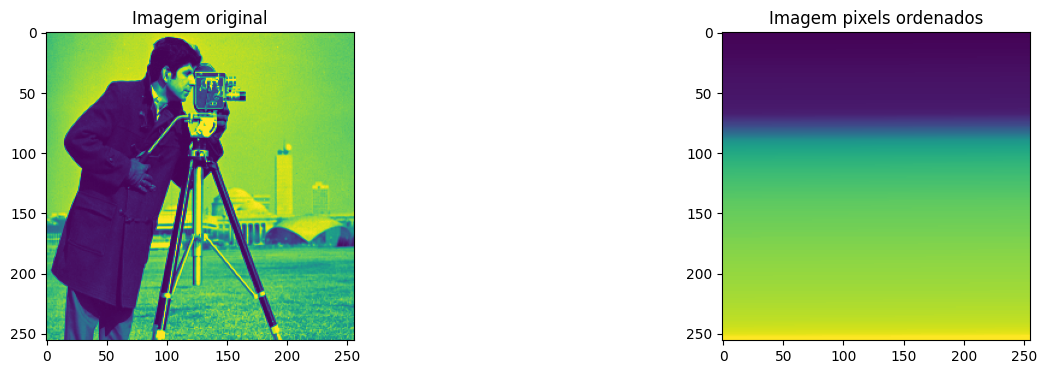

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.subplot(121)
f = mpimg.imread('../data/cameraman.tif')
plt.imshow(f)
plt.title('Imagem original')

plt.subplot(122)
fsort = np.sort(f.ravel()).reshape(f.shape)
plt.imshow(fsort)
plt.title('Imagem pixels ordenados')

Plotamos seu histograma e calculamos a transformação de contraste que equaliza o histograma baseado
na equação vista anteriormente. O somatório da equação é eficientemente calculado com a função
``np.cumsum`` que calcula a soma acumulada de um vetor. Visualizamos a transformação T[r] pelo gráfico:
   

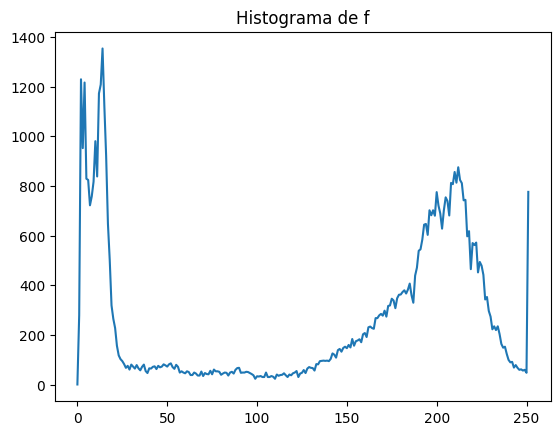

In [16]:
h = histogram.histogram(f)
plt.plot(h),plt.title('Histograma de f');

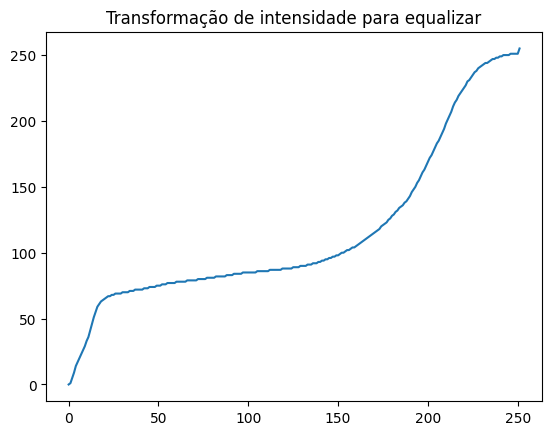

In [17]:
n = f.size
T = 255./n * np.cumsum(h)
T = T.astype('uint8')
plt.plot(T),plt.title('Transformação de intensidade para equalizar');

A aplicação da transformação T em f: fazendo-se g = T[f], resulta na imagem g equalizada.
Para fins ilustrativos, colocamos ao lado a imagem equalizada com seus pixels ordenados.
Observa-se que a distribuição dos níveis de cinza ficou uniforme:
 

Text(0.5, 1.0, 'imagem equalizada ordenada')

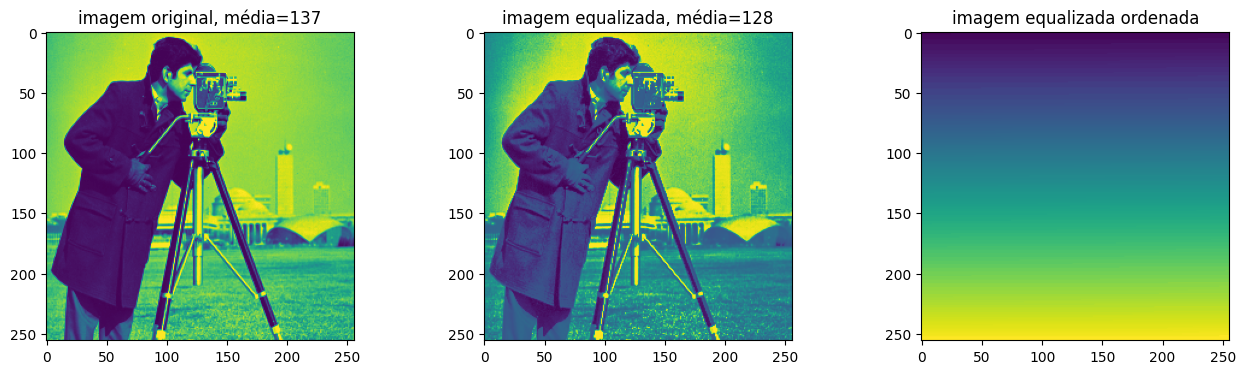

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plt.subplot(131)
plt.imshow(f)
plt.title('imagem original, média=%d' % (f.mean()))

plt.subplot(132)
g = T[f]
plt.imshow(g)
plt.title('imagem equalizada, média=%d' % (g.mean()))

plt.subplot(133)
gsort = np.sort(g.ravel()).reshape(g.shape)
plt.imshow(gsort)
plt.title('imagem equalizada ordenada')

Finalmente, plotamos o histograma da imagem equalizada. Note o efeito mencionado acima em que o
histograma equalizado fica espalhado. Quando se calcula o histograma acumulado, nota-se daí que
o histograma de fato está normalizado.
   

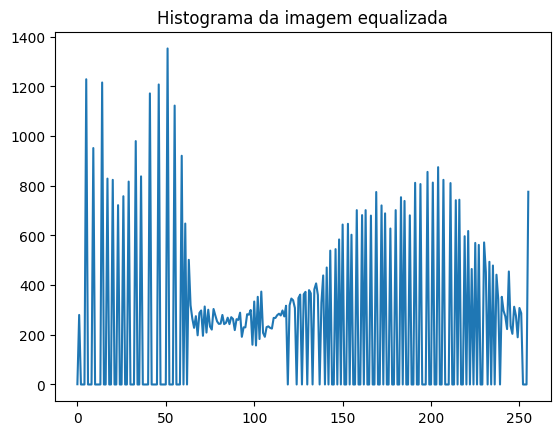

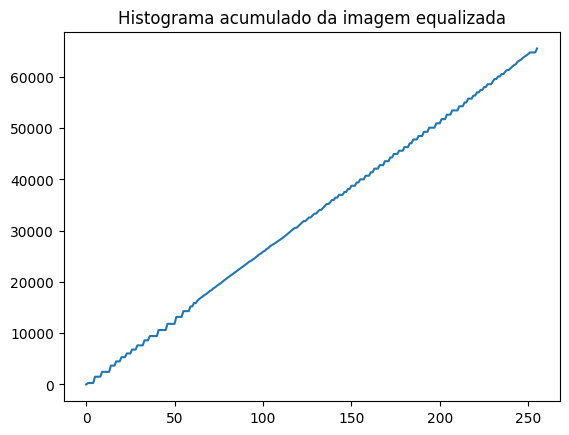

In [20]:
plt.figure(0)
hg = histogram.histogram(g)
plt.plot(hg),plt.title('Histograma da imagem equalizada')
plt.figure(1)
hgc = np.cumsum(hg)
plt.plot(hgc),plt.title('Histograma acumulado da imagem equalizada');

Um problema da formulação simplificada acima é que no caso da imagem original não ter nenhum
pixel igual a zero, a equalização da imagem usando esta formulação não irá fazer com que o
menor pixel seja zero. Veja o exemplo a seguir, onde o menor valor do pixel na imagem original é 75:

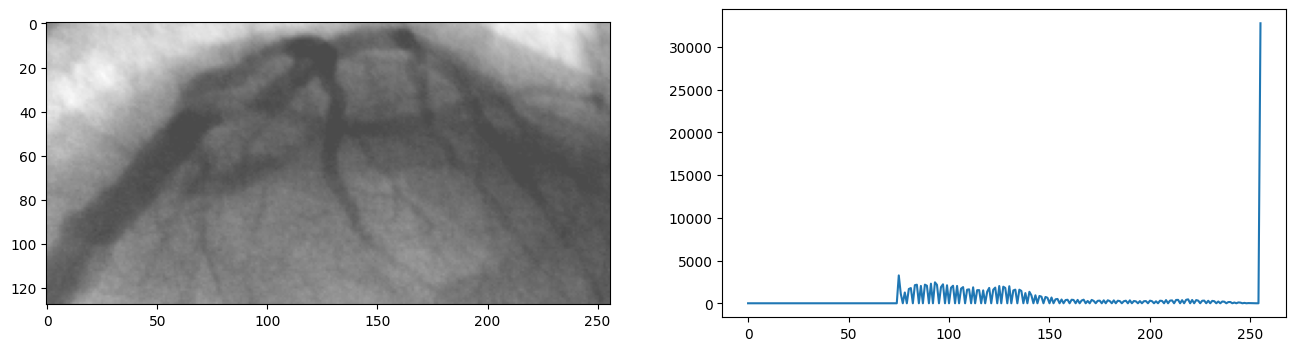

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.subplot(121)
f = mpimg.imread('../data/angiogr.tif')
f = np.clip(f,75,255)
plt.imshow(f)

plt.subplot(122)
h = histogram.histogram(f)
plt.plot(h);
#print('info:',ia.iaimginfo(f))

Observe que a Transformação que equaliza a imagem, o seu primeiro valor
não zero é 8 (pois T[75] = 8). Isto faz com que o menor valor da imagem equalizada resultante seja 8 e não zero como
desejado:

T: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   6   8   8  10  10  14  17  17  21  26  26  29  29  34  38
  38  42  42  47  51  51  55  59  59  63  63  67  71  71  75  75  78  82
  82  85  88  88  92  92  95  98  98 101 101 103 107 107 110 113 113 117
 117 121 125 125 128 128 131 134 134 138 140 140 143 143 145 147 147 149
 149 151 152 152 154 155 155 156 156 157 158 158 159 159 160 160 160 161
 162 162 163 163 163 164 164 165 165 165 166 166 167 167 167 168 168 169
 169 169 170 170 170 171 171 171 172 172 172 172 173 173 173 174 174 174
 175 175 175 176 176 176 176 177 178 178 178 178 179 180 180 180 181 181
 182 182 183 183 183 184 184 185 186 186 186 187 187 187 187 188 188 188
 189 189 189 189 189 190 190 190 190 190 190 191

Text(0.5, 1.0, 'imagem equalizada')

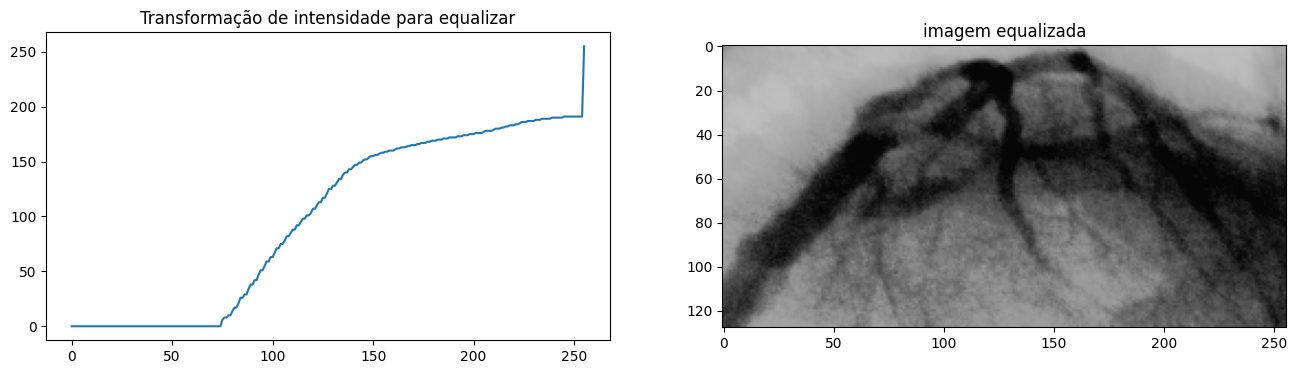

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.subplot(121)
n = f.size
T = 255./n * np.cumsum(h)
T = T.astype('uint8')
print('T:',T)
plt.plot(T),plt.title('Transformação de intensidade para equalizar')
g = T[f]
#print('info:', ia.iaimginfo(g))
plt.subplot(122)
plt.imshow(g)
plt.title('imagem equalizada')

Para fazer com que o valor do menor pixel da imagem equalizada seja zero, temos duas opções básicas:

1. Após a equalização, normalizar a imagem entre 0 e 255. Isto pode ser feito com  `ia898:normalize`.
2. Outra solução é alterar a equação do início desta página já incorporando esta normalização final. Esta
   equação é a mesma que aparece na descrição da Wikipedia, no link no final da página:

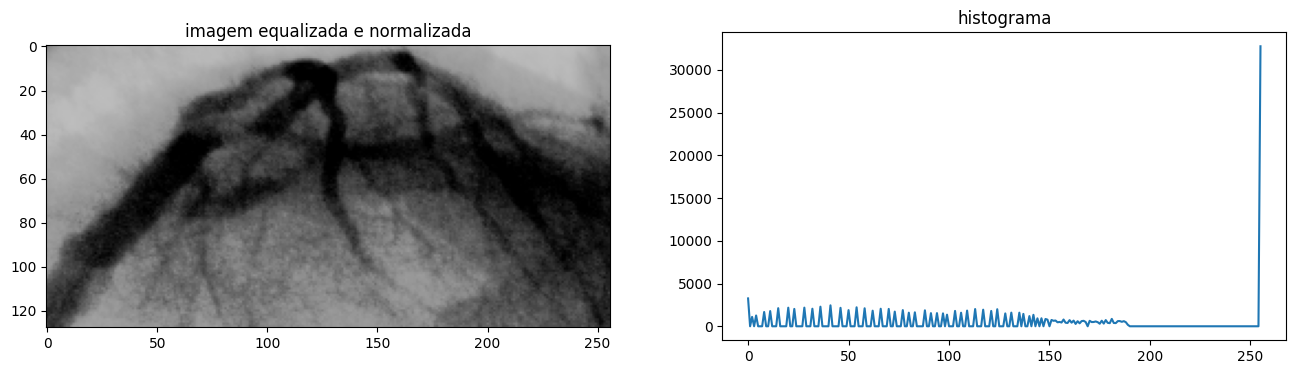

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.subplot(121)

gn = normalize.normalize(g)
#print 'info:',ia.iaimginfo(gn)
plt.imshow(gn)
plt.title('imagem equalizada e normalizada')
plt.subplot(122)

hgn = histogram.histogram(gn)
plt.plot(hgn),plt.title('histograma');

## Verificando a equação da wikipedia

In [31]:
wiki=np.array([[52,55,61,66,70,61,64,73],
              [63,59,55,90,109,85,69,72],
              [62,59,68,113,144,104,66,73],
              [63,58,71,122,154,106,70,69],
              [67,61,68,104,126,88,68,70],
              [79,65,60,70,77,68,58,75],
              [85,71,64,59,55,61,65,83],
              [87,79,69,68,65,76,78,94]])
print('wiki=\n',wiki)
h = histogram.histogram(wiki)
n = wiki.size
T = 255./n * np.cumsum(h)
T = np.floor(T).astype('uint8')
g = T[wiki]
print('g=\n',g)
gn = normalize.normalize(g)
print('gn=\n',gn)

wiki=
 [[ 52  55  61  66  70  61  64  73]
 [ 63  59  55  90 109  85  69  72]
 [ 62  59  68 113 144 104  66  73]
 [ 63  58  71 122 154 106  70  69]
 [ 67  61  68 104 126  88  68  70]
 [ 79  65  60  70  77  68  58  75]
 [ 85  71  64  59  55  61  65  83]
 [ 87  79  69  68  65  76  78  94]]
g=
 [[  3  15  55  95 147  55  75 167]
 [ 67  35  15 215 235 203 131 159]
 [ 59  35 119 239 251 227  95 167]
 [ 67  23 155 243 255 231 147 131]
 [ 99  55 119 227 247 211 119 147]
 [191  87  39 147 179 119  23 171]
 [203 155  75  35  15  55  87 195]
 [207 191 131 119  87 175 183 219]]
gn=
 [[  0  12  52  93 145  52  72 165]
 [ 64  32  12 214 234 202 129 157]
 [ 56  32 117 238 250 226  93 165]
 [ 64  20 153 242 255 230 145 129]
 [ 97  52 117 226 246 210 117 145]
 [190  85  36 145 178 117  20 170]
 [202 153  72  32  12  52  85 194]
 [206 190 129 117  85 174 182 218]]


Comparando-se o resultado (gn) com o valor da Wikipedia, percebemos que existe uma
pequena diferença nos valores de alguns pixels. Esta diferença é devido ao fato que
na equação da Wikipedia, é usado um arredondamento (**round**) enquanto que na
função `ia898:normalize`, é usado um truncamento. A seguir foi feita uma outra
função similar à ianormalize, porém utilizando a função (**round**). Note que
neste caso o resultado confere com a Wikipedia.

In [34]:
faux = g.ravel().astype('float')
minimum = min(faux)
maximum = max(faux)
lower = 0
upper = 255
gnn = np.round((faux - minimum) * (upper - lower) / (maximum - minimum) + lower,0)
gnn = gnn.reshape(g.shape).astype(np.int16)
print('gnn=\n',gnn)

gnn=
 [[  0  12  53  93 146  53  73 166]
 [ 65  32  12 215 235 202 130 158]
 [ 57  32 117 239 251 227  93 166]
 [ 65  20 154 243 255 231 146 130]
 [ 97  53 117 227 247 210 117 146]
 [190  85  36 146 178 117  20 170]
 [202 154  73  32  12  53  85 194]
 [206 190 130 117  85 174 182 219]]


## Referências

- [Wikipedia: Histogram Equalization](http://en.wikipedia.org/wiki/Histogram_equalization)
- [NumPy: cumsum](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
